In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Disable axis for all plots

In [ ]:
# rc = {"axes.spines.left" : False,
#       "axes.spines.right" : False,
#       "axes.spines.bottom" : False,
#       "axes.spines.top" : False,
#       "xtick.bottom" : False,
#       "xtick.labelbottom" : False,
#       "ytick.labelleft" : False,
#       "ytick.left" : False}
# plt.rcParams.update(rc)

# Remove ticks

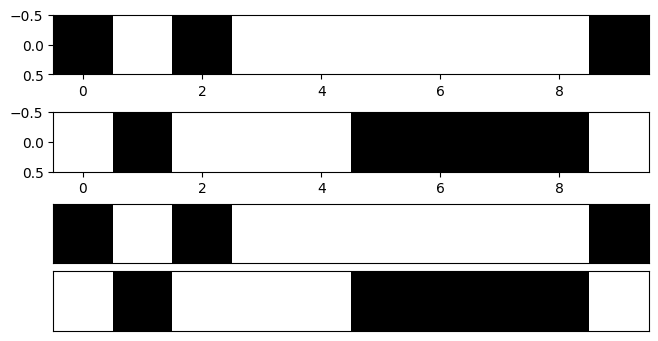

In [4]:

np.random.seed(68)
rows = np.random.randint(0,2,(2,10))
fig, ax = plt.subplots(4,1, figsize = (10,3.3), layout='constrained')

for i in range(2):
    ax[i].imshow(rows[[i]], 'gray_r')

for i in range(2):
    ax[i+2].imshow(rows[[i]], 'gray_r')
    ax[i+2].set_xticks([])
    ax[i+2].set_yticks([])


# Canvas and plot colors

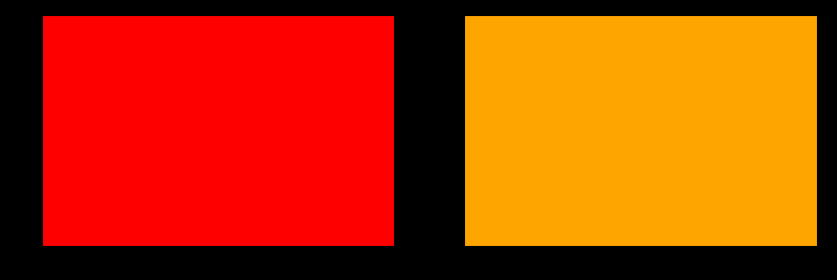

In [6]:
fig,ax = plt.subplots(1,2, figsize = (10,3), facecolor = 'black')
ax[0].set_facecolor('Red')
ax[1].set_facecolor('Orange')

camera: ax.view_init(elev=25, azim=-15, roll=0)

empty scatter points, higher layer (zorder): ax.scatter(*v0_test, edgecolors='red', facecolor='none', zorder=2)

# Gridspec

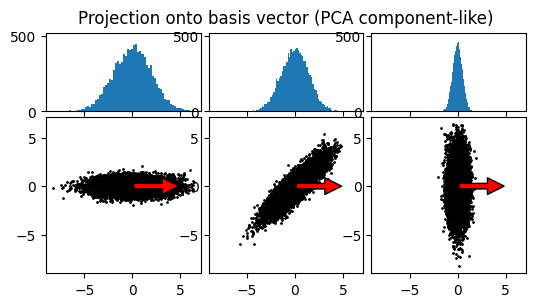

In [3]:
def rotation_matrix(angle):
    return np.array([
                    [np.cos(angle),    -np.sin(angle)],
                    [np.sin(angle),     np.cos(angle)] ])

center = np.array([2,1])
scaling = np.array([2,0.5])
angles = [0,np.deg2rad(45),np.deg2rad(90)]
num_points = 10000
pts = []

fig = plt.figure(figsize=(6, 3))

gs = fig.add_gridspec(2, len(angles),  height_ratios=(2, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

n_gaussians = np.diag(scaling) @ np.random.normal(size=(2, num_points)) 

top     = []
bottom = []
fig.suptitle('Projection onto basis vector (PCA component-like)')
for i, angle in enumerate(angles):
    
    x,y = rotation_matrix(angle) @ n_gaussians
    sharexy = bottom[-1] if i > 0 else None
    ax = fig.add_subplot(gs[1, i], sharex = sharexy, sharey = sharexy)
    
    ax.scatter(x, y, s = 1, c = 'k')
    ax.annotate('', (5,0),xytext=(0,0), arrowprops=dict(facecolor='red', shrink=0.03))
    
    bins    = np.linspace(np.min(x), np.max(x), 70 + 1)
    sharey = top[-1]  if i > 0 else None
    ax_histx = fig.add_subplot(gs[0, i], sharex=ax, sharey=sharey)
    ax_histx.hist(x, bins=bins)#, weights=np.abs(y)
    ax_histx.tick_params(axis='both', labelbottom=False)
    top.append(ax_histx)
    bottom.append(ax)